# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

**Bank Transaction Data Hasil Clustering (Fraud Detection)**

In [86]:
df=pd.read_csv('hasil_clustering_fraud_detection.csv')
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionFreq,...,Channel_Online,Cluster,Fraud,FraudLabel,DBSCAN_Label,DBSCAN_Cluster,DBSCAN_Fraud,PCA_1,PCA_2,Cluster_KMeans_Optimized
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,San Diego,81.0,1.0,5112.21,2024-11-04 08:08:08,7.0,...,0.0,1,False,Not Fraud,0,Normal,Not Fraud,-1.101489,-1.180496,1
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Houston,141.0,1.0,13758.91,2024-11-04 08:09:35,7.0,...,0.0,1,False,Not Fraud,0,Normal,Not Fraud,-1.152476,-1.189818,1
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Mesa,56.0,1.0,1122.35,2024-11-04 08:07:04,4.0,...,1.0,0,False,Not Fraud,1,Suspicious 1,Not Fraud,-0.472373,1.687352,0
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Raleigh,25.0,1.0,8569.06,2024-11-04 08:09:06,8.0,...,1.0,0,False,Not Fraud,1,Suspicious 1,Not Fraud,-0.248590,1.740147,0
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Atlanta,198.0,1.0,7429.40,2024-11-04 08:06:39,6.0,...,1.0,0,False,Not Fraud,1,Suspicious 1,Not Fraud,-0.476948,1.718466,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Colorado Springs,109.0,1.0,12690.79,2024-11-04 08:11:29,10.0,...,0.0,2,False,Not Fraud,2,Suspicious 2,Not Fraud,1.720189,-0.415941,2
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Tucson,177.0,1.0,254.75,2024-11-04 08:11:42,9.0,...,0.0,2,False,Not Fraud,2,Suspicious 2,Not Fraud,1.610073,-0.417022,2
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,San Diego,146.0,1.0,3382.91,2024-11-04 08:08:39,8.0,...,0.0,2,False,Not Fraud,2,Suspicious 2,Not Fraud,1.694537,-0.401088,2
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Denver,19.0,1.0,1776.91,2024-11-04 08:12:22,4.0,...,1.0,0,False,Not Fraud,1,Suspicious 1,Not Fraud,-0.437138,1.687370,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [87]:
X = df[['TransactionAmount', 'TransactionDuration', 'LoginAttempts',
        'AccountBalance', 'TransactionFreq', 'Channel_ATM',
        'Channel_Branch', 'Channel_Online']]
y = df['DBSCAN_Label']
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [88]:
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

Model yang akan dianalisis, yaitu KNN, Decision Tree, Random Forest, SVM, dan Naive Bayes.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

**EVALUASI MODEL PADA DATA TRAINING**

In [89]:
results_train = {'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_train, y_train),
                 'Decision Tree (DT)': evaluate_model(dt, X_train, y_train),
                 'Random Forest (RF)': evaluate_model(rf, X_train, y_train),
                 'Support Vector Machine (SVM)': evaluate_model(svm, X_train, y_train),
                 'Naive Bayes (NB)': evaluate_model(nb, X_train, y_train)}
summary_train_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
rows_train = []
for model_name, metrics in results_train.items(): rows_train.append({'Model': model_name,'Accuracy': metrics['Accuracy'],
                                                                     'Precision': metrics['Precision'],
                                                                     'Recall': metrics['Recall'],
                                                                     'F1-Score': metrics['F1-Score']})
summary_train_df = pd.DataFrame(rows_train)
print(summary_train_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.535590   0.535064  0.468659  0.476241
1            Decision Tree (DT)  1.000000   1.000000  1.000000  1.000000
2            Random Forest (RF)  1.000000   1.000000  1.000000  1.000000
3  Support Vector Machine (SVM)  0.340966   0.170558  0.266188  0.205491
4              Naive Bayes (NB)  0.991040   0.992939  0.961864  0.975804


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Berdasarkan nilai accuracy, precision, recall, dan F1-Score, terlihat bahwa model KNN san SVM pada data training memiliki performa yang buruk karena nilai pada metrik yang rendah. Selain itu, model Decision Tree dan Random Forest berpotensi overfitting karena semua metrik bernilai 1. Naive Bayes memiliki performa yang baik karena semua metrik tinggi > 96%. Namun, perlu dilakukan evaluasi lebih lanjut menggunakan data testing.

**EVALUASI MODEL PADA DATA TESTING**

In [90]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    num_classes = len(np.unique(y_test))

    if num_classes > 2:
        results = {
            'Confusion Matrix': cm,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='macro'),
            'Recall': recall_score(y_test, y_pred, average='macro'),
            'F1-Score': f1_score(y_test, y_pred, average='macro')}
    else:
        tn, fp, fn, tp = cm.ravel()
        results = {
            'Confusion Matrix': cm,
            'True Positive (TP)': tp,
            'False Positive (FP)': fp,
            'False Negative (FN)': fn,
            'True Negative (TN)': tn,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1-Score': f1_score(y_test, y_pred)}
    return results
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)}

summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']})

summary_df = pd.DataFrame(rows)

print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.324056   0.308445  0.280889  0.278748
1            Decision Tree (DT)  0.992048   0.993696  0.965517  0.978315
2            Random Forest (RF)  0.990060   0.992104  0.956897  0.972444
3  Support Vector Machine (SVM)  0.304175   0.149410  0.237097  0.181800
4              Naive Bayes (NB)  0.988072   0.990542  0.948276  0.966389


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

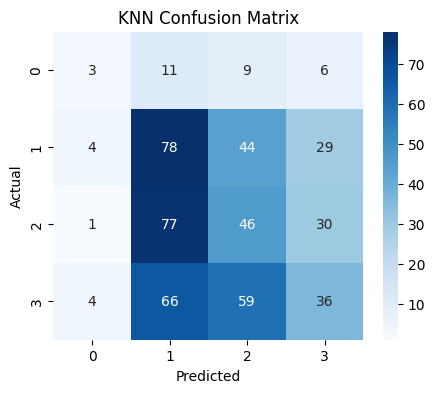

In [91]:
cm_knn = results['K-Nearest Neighbors (KNN)']['Confusion Matrix']
plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

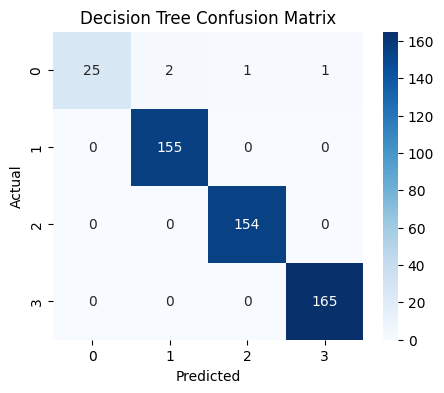

In [92]:
cm_dt = results['Decision Tree (DT)']['Confusion Matrix']
plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

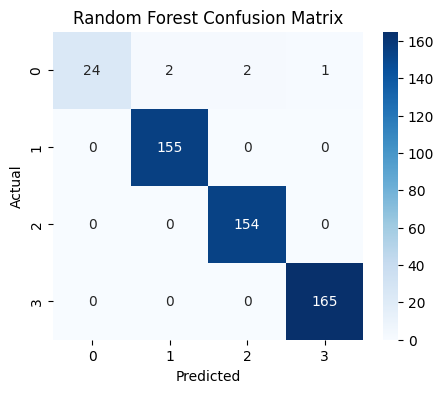

In [93]:
cm_rf = results['Random Forest (RF)']['Confusion Matrix']
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

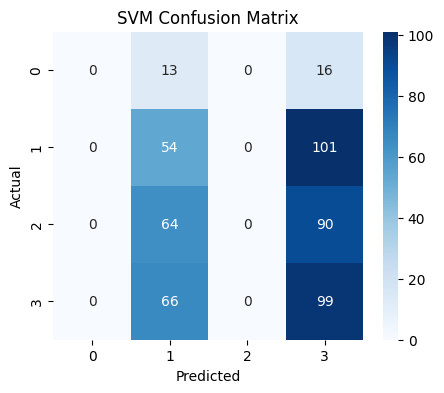

In [94]:
cm_svm = results['Support Vector Machine (SVM)']['Confusion Matrix']
plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

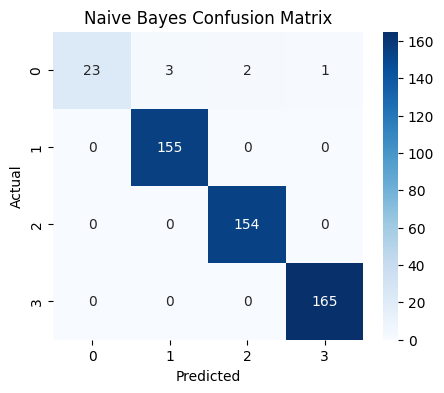

In [95]:
cm_nb = results['Naive Bayes (NB)']['Confusion Matrix']
plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Analisis Hasil Evaluasi Model pada Data Training**
1. KNN memiliki accuracy sebesar 32.41%, precision: 30.84%, recall: 28.08%, dan F1-Score: 27.87% Model ini memiliki performa yang sangat rendah dan tidak dapat mengidentifikasi dengan tepat. Oleh karena itu, KNN bukan model yang cocok untuk data fraud detection.

2. Decision Tree memiliki accuracy 99.01%. Precision sangat tinggi, yaitu 99.21% yang artinya model mengklasifikasikan transaksi dengan kemungkinan besar prediksi benar. Recall 95.69% juga cukup tinggi yang artinya model berhasil mengidentifikasi transaksi secara tepat. F1-Score yang tinggi, yaitu 97.25% artinya precision dan recall menunjukkan keseimbangan yang baik.

3. Random Forest juga tidak berbeda jauh dengan Decision Tree. Model ini memiliki accuracy 99.01%. Precision 99.21% yang artinya model mengklasifikasikan transaksi dengan kemungkinan besar prediksi benar. Recall sebesar 95.69% juga cukup tinggi yang artinya model berhasil mengidentifikasi transaksi secara tepat. F1-Score yang tinggi, yaitu 97.24% artinya precision dan recall menunjukkan keseimbangan yang baik.

4. SVM memiliki accuracy: 30.42%, precision: 14.94%, recall: 23.71%, dan F1-Score: 18.18%. Model ini memiliki performa yang sangat rendah dan tidak dapat mengidentifikasi dengan tepat. Oleh karena itu, SVM bukan model yang cocok untuk data fraud detection.

5. Naive Bayes memiliki accuracy 98.81%. Precision sangat tinggi, yaitu 99.05% yang artinya model mengklasifikasikan transaksi dengan kemungkinan besar prediksi benar. Recall 94.83% juga cukup tinggi yang artinya model berhasil mengidentifikasi transaksi secara tepat. F1-Score yang tinggi, yaitu 96.64% artinya precision dan recall menunjukkan keseimbangan yang baik.


Berdasarkan analisis, 3 model terbaik adalah Naive Bayes, Decision Tree, dan Random Forest.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [96]:
# Tuning model Decision Tree
dt_params = {'criterion': ['gini', 'entropy'],
                'max_depth': [None, 5, 10, 15],
                'min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_split': [2, 5, 10]})

In [97]:
# Tuning random forest
rf_params = {'n_estimators': [50, 100],
                'max_depth': [None, 10, 20],
                'min_samples_split': [2, 5],
                'bootstrap': [True, False]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]})

In [98]:
# Tuning model Naive Bayess
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [99]:
# Evaluasi model Decision Tree setelah tuning
best_dt = grid_dt.best_estimator_
print("\nHyperparameter terbaik model Decision Tree:", grid_dt.best_params_)
print("\nScore model Decision Tree pada data training:")
print(classification_report(y_train, best_dt.predict(X_train)))
print("\nScore model Decision Tree pada data testing:")
print(classification_report(y_test, best_dt.predict(X_test)))


Hyperparameter terbaik model Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5}

Score model Decision Tree pada data training:
              precision    recall  f1-score   support

          -1       0.99      0.98      0.99       118
           0       1.00      1.00      1.00       619
           1       1.00      1.00      1.00       613
           2       1.00      1.00      1.00       659

    accuracy                           1.00      2009
   macro avg       1.00      1.00      1.00      2009
weighted avg       1.00      1.00      1.00      2009


Score model Decision Tree pada data testing:
              precision    recall  f1-score   support

          -1       0.96      0.86      0.91        29
           0       0.99      0.99      0.99       155
           1       0.99      1.00      1.00       154
           2       0.99      1.00      1.00       165

    accuracy                           0.99       503
   macro avg       0.98      0.96   

In [100]:
# Evaluasi model Random Forest setelah tuning
best_rf = grid_rf.best_estimator_
print("Hyperparameter terbaik model Random Forest:", grid_rf.best_params_)
print("\nScore model Random Forest pada data training:")
print(classification_report(y_train, best_rf.predict(X_train)))
print("\nScore model Random Forest pada data testing:")
print(classification_report(y_test, best_rf.predict(X_test)))

Hyperparameter terbaik model Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}

Score model Random Forest pada data training:
              precision    recall  f1-score   support

          -1       1.00      0.97      0.98       118
           0       1.00      1.00      1.00       619
           1       1.00      1.00      1.00       613
           2       1.00      1.00      1.00       659

    accuracy                           1.00      2009
   macro avg       1.00      0.99      0.99      2009
weighted avg       1.00      1.00      1.00      2009


Score model Random Forest pada data testing:
              precision    recall  f1-score   support

          -1       1.00      0.83      0.91        29
           0       0.99      1.00      0.99       155
           1       0.99      1.00      0.99       154
           2       0.99      1.00      1.00       165

    accuracy                           0.99       503
   macro avg       

In [101]:
# Evaluasi model Naive Bayes setelah tuning
print("\nScore model Naive Bayes pada data training:")
print(classification_report(y_train, nb.predict(X_train)))
print("\nScore model Naive Bayes pada data testing:")
print(classification_report(y_test, nb.predict(X_test)))


Score model Naive Bayes pada data training:
              precision    recall  f1-score   support

          -1       1.00      0.85      0.92       118
           0       0.98      1.00      0.99       619
           1       1.00      1.00      1.00       613
           2       0.99      1.00      1.00       659

    accuracy                           0.99      2009
   macro avg       0.99      0.96      0.98      2009
weighted avg       0.99      0.99      0.99      2009


Score model Naive Bayes pada data testing:
              precision    recall  f1-score   support

          -1       1.00      0.79      0.88        29
           0       0.98      1.00      0.99       155
           1       0.99      1.00      0.99       154
           2       0.99      1.00      1.00       165

    accuracy                           0.99       503
   macro avg       0.99      0.95      0.97       503
weighted avg       0.99      0.99      0.99       503



## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

**Analisis Evaluasi Model**

- Berdasarkan hasil evaluasi, metrik model Decision Tree dan Random Forest selalu bernilai 1 pada data training. Hal ini mengindikasikan model Decision Tree dan Random Forest berpotensi overfitting. Namun, pada data testing, model memiliki performa sangat baik karena nilai yang tinggi di semua metrik dan tidak sempurna bernilai 1.

- Model Naive Bayes memiliki performa yang baik dengan nilai metrik yang cukup tinggi dan tidak berpotensi overfitting. Performa model juga naik setelah dilakukan tuning.

- Model Decision Tree, Random Forest, dan Naive Bayes mampu melakukan klasifikasi secara akurat pada Bank Transaction Data untuk mendeteksi penipuan pada transaksi. Meskipun demikian, rekomendasi yang dapat dilakukan adalah mencoba pruning pada model Decision Tree dan Random Forest apabila model dianggap terlalu kompleks agar tidak terjadi overfitting.